In [1]:
!pip install pygame

# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

Press ESC to close the simulation, or [SPACE] to pause the simulation.

**Answer:**

- The Smartcab did not move at any point during the simulation i,e. the agent always remains idle


- The agent recieves a positive reward of points between 0 and 2 when it idles at a red light, however it recieves a comparatively larger penalty (negative rewards) of points between -4.5 and -6 for idling at a green light with no on-coming traffic.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

- The flags that can be set to change the simulation are: verbose, num_dummies, grid_size, learning, epsilon, alpha, enforce_deadline, update_delay, display, log_metrics, optimized, tolerance and  n_test. We will choose to explain the following three flags: 
  
  1) num_dummies: This decides the number of dummy agents (cars other than our agent) in the environment
  
  2) learning: Depending upon whether it is true or false, the agent uses Q-learning to decide it's actions
  
  3) enforce_deadline: Depending upon whether it is true of false, the agent is required to get to it's goal within a specified deadline period
  
  
- When the agent performs an action (via the update function in the LearningAgent class of agent.py), it subsequently calls the function act of the Environment class in environment.py in order to receive a reward/penalty for it's action.  


- In simulator.py, the function render_text() produces the information about the outcome of each step at the terminal in a text format. On the other hand, the function render() produces a graphical representation of the simulation on the screen.


- The next_waypoint() function in planner.py considers the East-West direction first. 

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


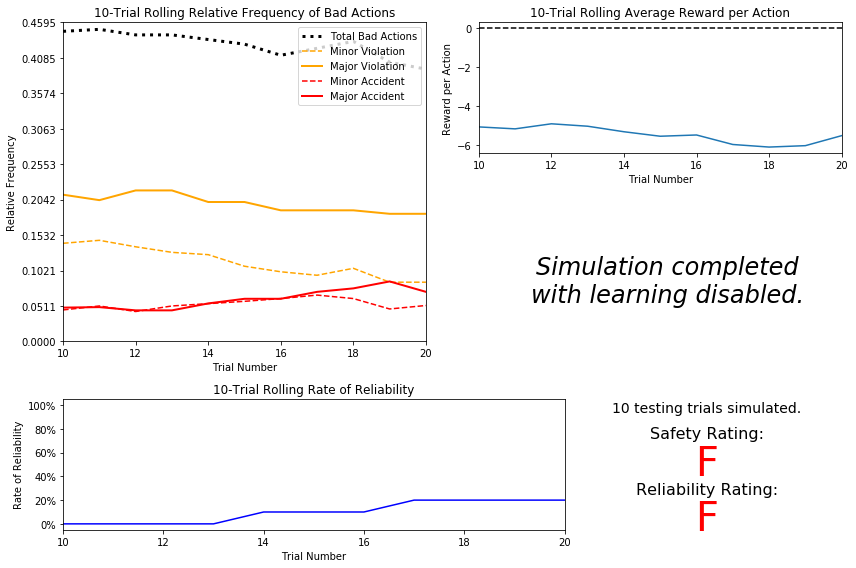

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

- We notice that the rate at which the agent makes bad decisions does not change much and stays between $40\%$ and $45\%$. The rate of bad decisions being close to $50\%$ can perhaps be attributed to whether the agent decides to remain idle or move (in any direction) at the intersections. Since these decisions are being taken randomly, the decisions will be consistent with the light only $50\%$ of the time. This is also supported by the fact that the agent commits major traffic violations about $\sim 20\%$ of the times. Theoretically, we would expect a random agent to come across a red light for $50\%$ of its runtime. A random agent will run these red lights half of the time. Thus theoretically we expect the agent to be committing a major traffic violation for $25\%$ of it total run time. The observed $20\%$ is not too far from this expected $25\%$ rate of major traffic violations. 


- Out of these bad decisions, roughly 1/10 th of them lead to minor accidents and another 1/10 of these bad decisions lead to major accidents. Thus about 1/5 th of the bad decisions lead to accidents. This implies that the agent causes an accident about $10\%$ of the time. The agent also cause major traffic violations about $20\%$ of the time.


- Given that the agent is acting randomly, we expect it to be completely unreliable and hence have a low reliability rate. This is indeed the case with the reliability rate being at most $20\%$. From the panel it looks like the reliability rate improves with the number of trials. Since the agent is not making any informed decisions, this improvement in its reliability has to be statistical in nature. Indeed, one can check that multiple runs of the above simulation does not always show such an improvement in reliability. 


- The agent is receiving an average negative reward for its actions. These also do not change much and always lie between -6 and -4. Given that the agent is wrong only about $40\% - 45\%$ of the time, the overall negative average suggests that the agent is recieving large penalties for such bad actions as compared to the rewards it gets when its actions are acceptable.   


- As the number of trials increase the various results do not seem to change a lot. This is again expected since at no point does the agent try to use it's imformation about previous rewards and penalties to guide it's decisions. 


- The high rate of bad decisions a significant fraction of which cause major accidents, implies that the agent is not safe at all. Similarly, the low relaibility suggests that the agent is not reliable. This can also be ascertained by the fact that the agent receives an F for both safety as well as reliability. 

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:** 

- The features that are important for safety are:
      
      1) 'light': It is important that the agent only moves when the traffic light is green and stays put otherwise. Not obeying this rule can lead to accidents.
      
      2) 'oncoming': If the light is green, the agent must inspect the direction of the oncoming traffic before it decides upon direction in which it intends to move. For example, turning left with oncoming traffic will lead to a minor accident. 
      
      3)  'left': We assume that the agent is allowed to turn right on a red light. In this case it will also have to be cautious about the cars from it's left so as not to cause an accident. 
      

- Assuming that all the other cars in the simulation follow the lights perfectly, we don't think that the cars on the agents right hand side matter. This is because their green light will coincide exactly with the agents red light and thus once the agent has learnt to follow the lights, the cars on the right side will be not a concern. 



- The agent will be most efficient when it follows the direction suggested by the 'waypoint'. This will maximise it's chance to get to it's destination. In fact this is the only indicator for the agents destination and hence without this the agent will not be able to find it's destination.  



- On the otherhand, information about the deadline does not seem to be useful for anything. In a scenario where the agent had a variable speed, it could have dialed it's speed depending upon the deadline, but in the current case an agent that wishes to move safely by following the traffic rules can at most do exactly as suggested by the waypoint when the situation is conducive for such an action. Keeping track of the deadline does will not be of any help in this process. On the otherhand, including this as a state-feature will vastly increase the allowed number of possible distinct states. This would then imply that during any simulation most of the state-space will remain unexplored. During testing the agent will then frequently find itself in a previously unencountered state and will have not way of making an informed decision in this scenario, thus greatly reducing the performance of the agent and it will  be perhaps be no better than the random agent.  


- Thus our state will be described by the following features: $$[\rm waypoint, \ light, \ oncoming, \ left] $$

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

- no. of possible values for each of the feature in our state is as follows:
     
     - waypoint : 3
     - light : 2
     - oncoming : 4
     - left : 4
     
- This implies that the total number of different states is 3 x 2 x 4 x 4 = 96



- on top of it each such state will have 4 possible choices for actions. Thus there will be a total of 96 x 4 = 384 state-action pairs that the agent will have to learn in order to make well informed decisions. This is not a small number but it is not too big either. So let us say that on an average we want the agent to experience each state about 15 times during training, then the total number of trials needed is 5760. Each trial seems to take about 1 second (or less) to complete (when updating as fast as possible). Thus, we would expect it to take at most 1.6 hours to train the agent. This is not a terribly large amount of time and looks quite reasonable.   

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

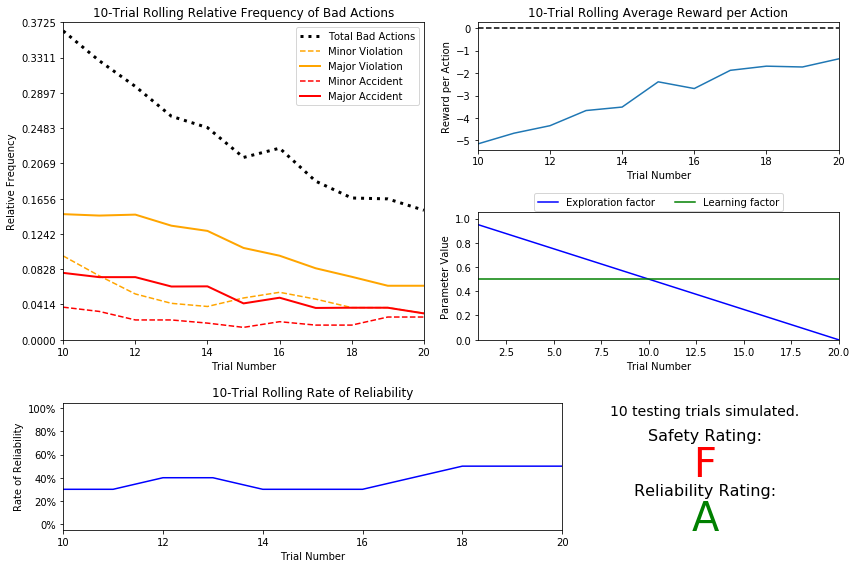

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**


- The first thing we notice is that the rate of bad decisions made by the agent decreases constantly with the number of trials. This is because after each trial, we reduce the exploration factor slightly, thereby allowing the agent to increasingly draw upon it's past experiences to make an informed choice for it's actions. However, this decrease in bad-decision rate though significant is still not large enough to allow the agent to behave safely enough. This is because, as pointed out earlier, the space of state-actions pairs remains largely unexplored with such a small number of training sessions. That this is indeed the case can also be ascertained from looking at the Q-table stored in sim_default-learning text file generated by the computer. upon looking at this text file, we notice that almost all the state-action pairs have the default Q-value i.e 0.0 with only a few of them that got updated updated.

- To me it appears that the reduction in the bad-decision rate is largely due to a reduction in major traffic violations by the agent. It has therefore perhaps learnt to be more cautious on a red light. This can also be ascertained by looking the txt file mentioned above: one can notice that many of the actions have negative rewards in states with the light being red. Thus space of allowed choices in such states reduces thereby making the agent more cautious.

- On the other hand there doesn't seem to be much of an improvement in the accident rate of the agent when compared to a random agent. This is perhaps because given the many possible configurations for the oncoming cars and those to the left, the agent is still largely uninformed about what how to act appropriately.   

- That the agent is indeed improving it's decision making ability is also reflected in the fact that it's average reward per action increase at about a constant rate during the simulation. However, average rewards never become positive implying that the agent is still far from being perfect and needs to improve quite a lot more. In other words we need to train it for a much longer time to make sure it is able to explore the state-space properly.


- The reliability of the agent has also improved significantly. (The best training reliability of the random agent was $\sim 20\%$, while the best training reliability of the agent now is $\sim 40\% $). From the reliability-graph it does not look like the reliability changes by too much during training. However, the testing reliability is extremely high. This is because during training, the agent is still exploring it's environment and therefore continues to make random choices albeit at a decreasing rate. This randomness therefore keeps the reliability to be relativily low when compared to the reliability of the agent during the testing session. 


- The decay of the exploration rate as implemented by us seems to be fine and produces the correct graph. 





-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

## <font color = green> $$\epsilon = 1 , \ t_{max} = 5000 $$ </font>

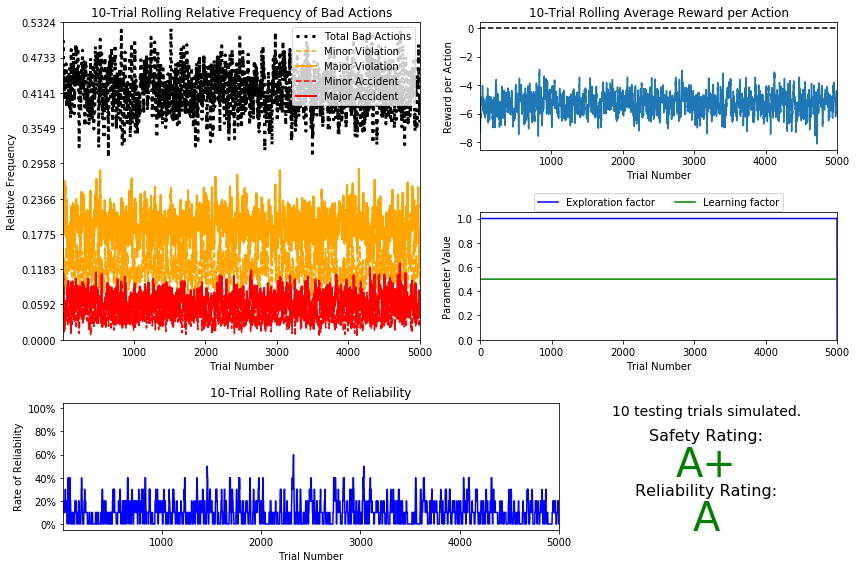

In [4]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

## <font color = green> $$\epsilon = 1-0.000192 t , \ t_{max} \sim 5000 $$ </font>

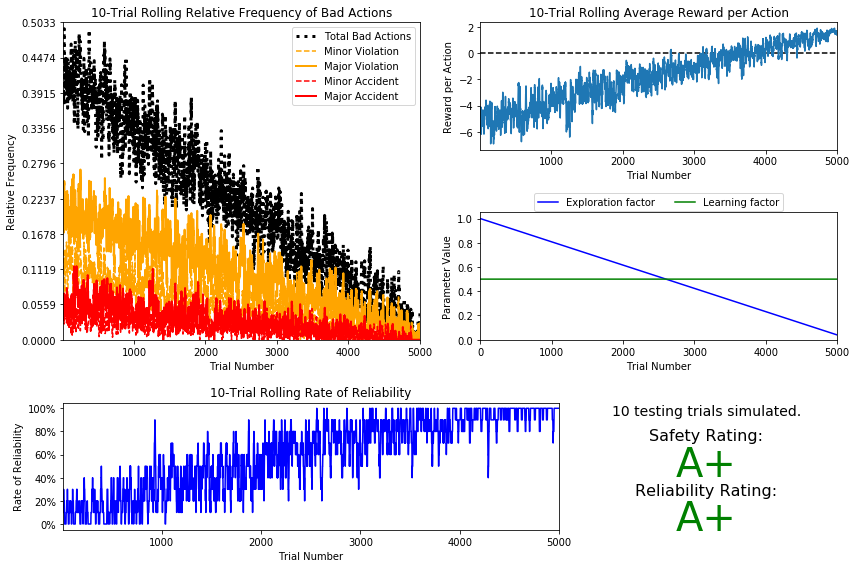

In [5]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

## <font color = green> $$\epsilon = 0.9994^t , \ t_{max} \sim 5000 $$ </font>

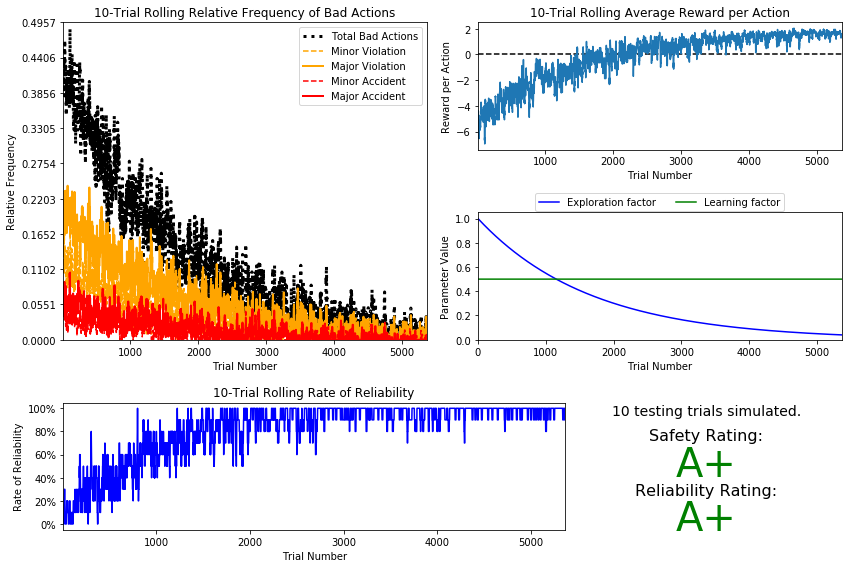

In [6]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

## <font color = green> $$\epsilon = \rm{Cos} (0.0003 t), \ t_{max} \sim 5000 $$ </font>

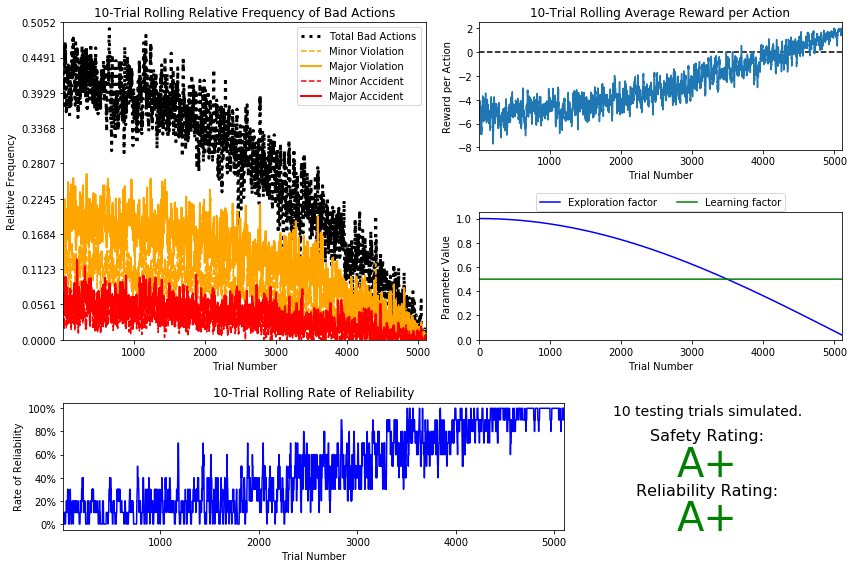

In [7]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

## <font color = green> $$\epsilon = \rm{Tanh} (\frac{5\times 10^9}{t^3}), \ t_{max} \sim 5000 $$ </font>

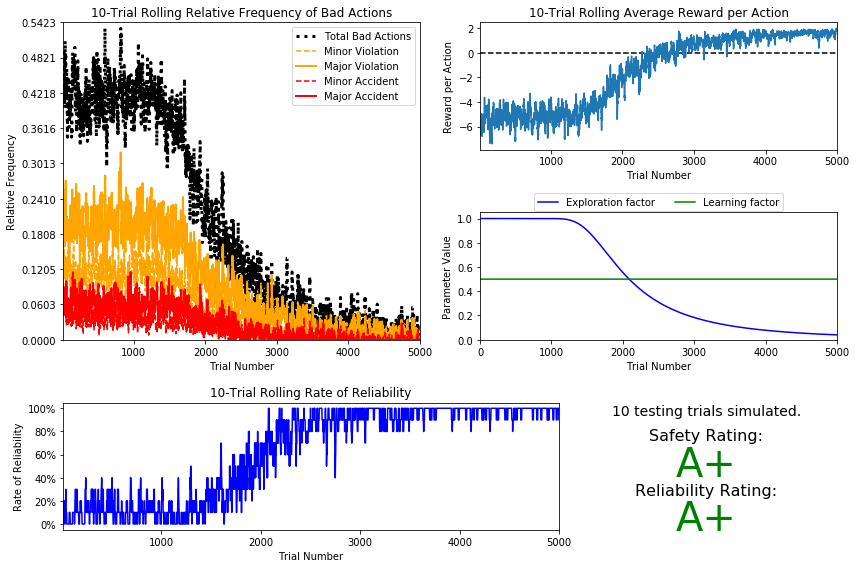

In [8]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Final Run with 1000 test simulations
### <font color = green> $$\epsilon = \rm{Cos} (0.0003 t), \ t_{max} \sim 5000 $$ </font>

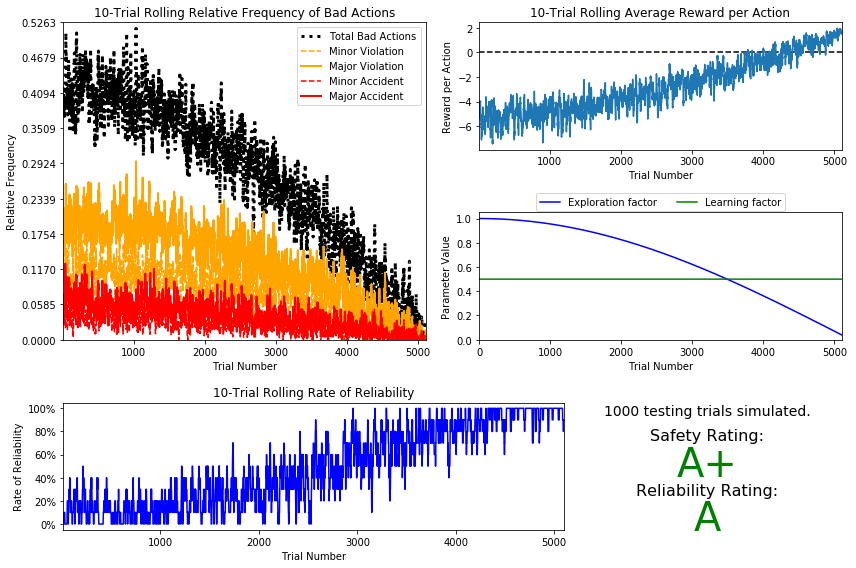

In [9]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

- We use a multitude of different decaying functions for the exploration factors. The corresponding results are as follows:


|exploration fucntion         | Safety Rating | Reliability Rating |
|------------------------------|---------------|--------------------|
| $\epsilon_t =1, \ t \leq 5000$    | A+            | A                 |
|$\epsilon_t = 1-0.000192 t$  | A+            | A+                |
| $\epsilon_t = 0.9994^t$ | A+ | A+| A+ |
| $\epsilon_t=\cos(0.0003t)$    | A+|A+|
| $\epsilon_t=\tanh(\frac{5 \times 10^9}{t^3})$ | A+ | A+|

- In each case of the exploration function the training ran for about 5000 trials before the agent began testing

- We notice that given that we ran the training for a large number of trials, therefore no matter what the decaying function was, the agent learnt its environment very well and had a very high performance in all of them.

- Thus for our final run, we aribtrarily chose to train the agent with the decay function $ \epsilon = \cos (0.0003t)$, for 5000 trials and tested it on a 1000 trials. We still obtained A+ for safety and A for reliability showing that the agent is performing extremely well.  

- We kept alpha to be 0.5. The reason behind keeping alpha at 0.5 was because a larger value would have given a larger weight to the more recent experiences of the agent a lot more while a smaller value of alpha will have give new experiences a lot less weight. On the other hand alpha = 0.5 seemed like a more balanced choice. 


- On the otherhand, we chose the tolerance to be 0.04. This along with the various other parameters of the exploration funcitons were engineered to make the training last for approximately 5000 trials. We wanted approximately 5000 training trials because we wanted the agent to experience each possible state for an average of 15 times, thereby ensuring the agent thorougly learns the appropriate actions allowed in each state. 


- The default Q-learner in the previous section was not very good and got an F rating for safety. On the other hand we notice that the improved Q-learner here has an A+ rating for both safety and also for reliability in most of the cases corresponding to the different exploration functions.


- Also it looks like, by the end of its training the default Q-learner had an average reward of about -2 while our improved Q-learners almost always start attaining a reward of +2 by the end of training. 


- Given the results, we strongly believe that our Q-learners have learnt the appropriate policy. 


- The ratings are perfect for both safety and very high reliability




### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 


1) The optimal pollicy is as follows (here when we say that the on_coming car turns left, we mean it turns to its own left as opposed to the agents left):

|light|left_car|oncoming_car|waypoint|action|
|-----|--------|------------|--------|------|
| red | forward| anything|anything| None |
|red| anything but forward|anything|anything but right|None|
|red|anything but forward| anything|right|right|
|green|anything|None|anything| same as waypoint|
|green|anything|left|anything |left|
|green|anything|forward|left|forward (expecting to take the next left)|
|green|anything|forward|anything but left|same as waypoint|
|green|anything|right|left|forward (expecting to take the next left)|
|green|anything|right|anything but left|same as waypoint|

2) 


-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.